# Imports

In [2]:
import string
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,r2_score,accuracy_score,f1_score
from sklearn import metrics
from sklearn import tree
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB


# Variables

In [ ]:
dsn = None
flag = []
ac1 = []
ac2 = []

# Classification 

In [7]:
df_class = pd.read_csv("student_exam_data.csv")
df_class.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [8]:
df_class.columns

Index(['Study Hours', 'Previous Exam Score', 'Pass/Fail'], dtype='object')

In [9]:
# To Check for NULLs
df_class.isna().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [10]:
# To Check for Duplicates
df_class.duplicated().sum()


0

In [12]:
y_class = df_class['Pass/Fail']
X_class =  df_class.drop(['Pass/Fail'], axis=1)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_class, y_class, test_size=0.2,random_state=0)
y_class.value_counts()
# 0 Represents Pass & 1 Represents Fail

0    316
1    184
Name: Pass/Fail, dtype: int64

## Data Visualization


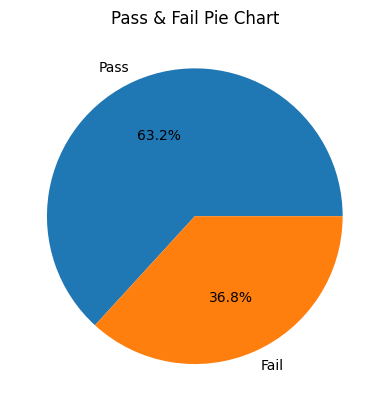

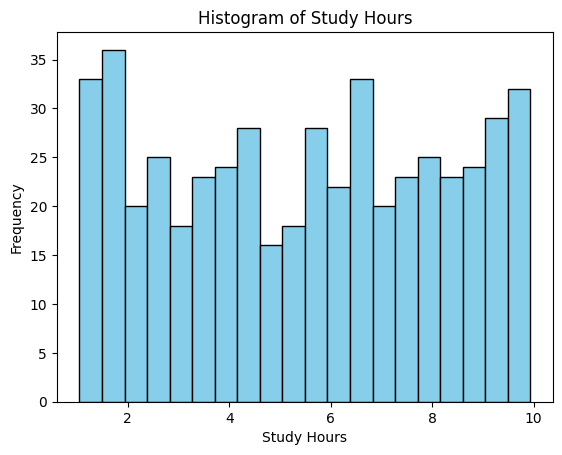

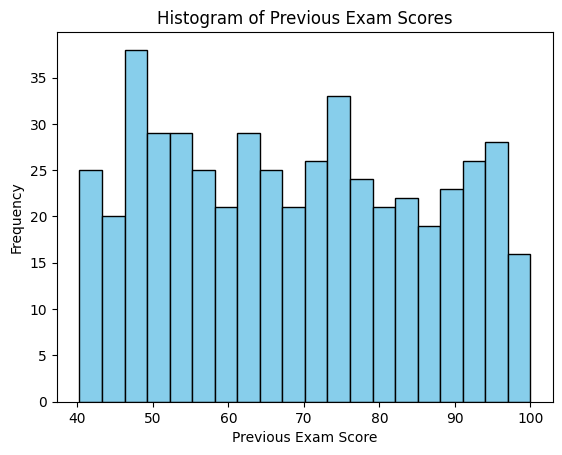

Classification Data Correlation Matrix:
                     Study Hours  Previous Exam Score  Pass/Fail
Study Hours             1.000000             0.010354   0.583505
Previous Exam Score     0.010354             1.000000   0.443706
Pass/Fail               0.583505             0.443706   1.000000


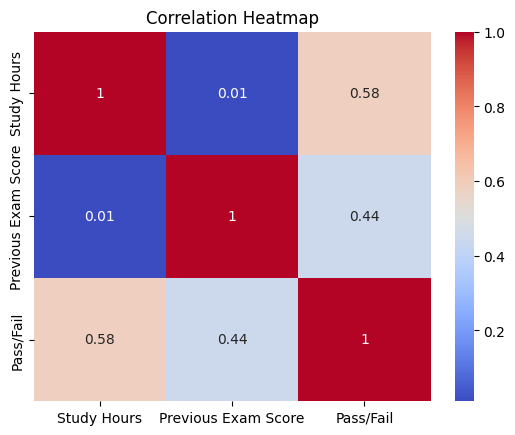

In [13]:
#Data Visualization 
#Plotting Data Individually 

Pass_Fail = df_class['Pass/Fail'].value_counts()
plt.pie(Pass_Fail, labels=['Pass', 'Fail'], autopct='%.1f%%')
plt.title('Pass & Fail Pie Chart')
plt.show()

StudyHours=df_class['Study Hours']
plt.hist(StudyHours, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Study Hours')
plt.show()

Prev_Exam_Score=df_class['Previous Exam Score']
plt.hist(Prev_Exam_Score, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Previous Exam Score')
plt.ylabel('Frequency')
plt.title('Histogram of Previous Exam Scores')
plt.show()

# Generate the correlation matrix
correlation_matrix_Class = df_class[['Study Hours', 'Previous Exam Score', 'Pass/Fail']].corr()

# Print out the correlation matrix
print("Classification Data Correlation Matrix:")
print(correlation_matrix_Class)

#Generate a heatmap for the correlation matrix
sns.heatmap(correlation_matrix_Class, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
###################################################
# Read the CSV file "satgpa.csv" into a DataFrame
df = pd.read_csv("satgpa.csv", encoding='latin-1')
df.head()               # Display the first few rows of the DataFrame
df.isna().sum()         # Check the number of missing values in each column of the DataFrame
df.duplicated().sum()   # Check the number of duplicated rows in the DataFrame
df.describe()           # Generate descriptive statistics of the DataFrame
df.columns              # Retrieve the column names of the DataFrame

##################################################
# Data Visualization
# Plotting Data individually
Gender = df['sex'].value_counts()

# Pie chart showing the percentage of females and males
plt.pie(Gender, labels=['Females', 'Males'], autopct='%.1f%%')
plt.title('Gender Pie Chart')
plt.show()

# Histograms of sat_scores
Sat_V = df['sat_v']
plt.hist(Sat_V, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sat_v Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Sat_v')
plt.show()

Sat_m = df['sat_m']
plt.hist(Sat_m, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sat_m Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Sat_m')
plt.show()

Sat_sum = df['sat_sum']
plt.hist(Sat_sum, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sat_sum Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Sat_sum')
plt.show()

# Box-Plot of hs_gba & fy_gba 
High_School_GPA=df['hs_gpa']
First_Year_GPA=df['fy_gpa']
data = [High_School_GPA,First_Year_GPA]
sns.boxplot(data)
plt.show()

# Generate the correlation matrix
correlation_matrix = df[['sex', 'sat_v', 'sat_m', 'sat_sum', 'hs_gpa', 'fy_gpa']].corr()

# Print out the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

#Generate a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df, hue='sex')
####################################################

Ridge Regression

In [ ]:

y = df['fy_gpa']                            # Extract the 'fy_gba' column as the target variable
X = df.drop(['fy_gpa'], axis=1)             # Drop the 'fy_gba' column from the DataFrame and assign the remaining columns to X

# Split the data into training and testing sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
model1 = LinearRegression()                 # Create an instance of the LinearRegression model
model1.fit(X_train, y_train)                # Fit the model using the training data
y_hat = model1.predict(X_test)              # Predict the target variable using the test data

# Calculate the mean squared error (MSE) between the actual and predicted values
print('MSE :' , mean_squared_error(y_test, y_hat))
plt.scatter(y_test, y_hat)

# Calculate the coefficient of determination (R-squared score) between the actual and predicted values
print('r2_score = ',r2_score(y_test, y_hat))

######################################################
# Ridge Regression
def RIDGEREG():
    # Global variables
    global flag  # Indicator flag
    global ac3  # List to store evaluation metrics
    global lisreg  # List to store regression model information
    global ax  # List to store mean absolute error
    global az  # List to store root mean squared error
    global ay  # List to store mean squared error

    flag.append(4)  # Append value 4 to the flag list

    y = df['fy_gpa']  # Target variable
    X = df.drop(['fy_gpa'], axis=1)  # Features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # Split the data into training and test sets

    reg = linear_model.Ridge(alpha=0.01, fit_intercept=True)  # Create a Ridge regression object
    reg.fit(X_train, y_train)  # Fit the regression model using training data
    y_hat = reg.predict(X_test)  # Predict the target variable for test data

    #print('MSE :' , mean_squared_error(y_test, y_hat))
    plt.scatter(y_test, y_hat)  # Scatter plot of predicted vs. actual values
    print('R2 :' , r2_score(y_test, y_hat))  # Compute R2 score

    ax = [metrics.mean_absolute_error(y_test, y_hat)]  # Compute and store mean absolute error
    ay = [metrics.mean_squared_error(y_test, y_hat)]  # Compute and store mean squared error
    az = [np.sqrt(metrics.mean_squared_error(y_test, y_hat))]  # Compute and store root mean squared error

    validation()  # Call the validation function

    return reg  # Return the regression model

## Logistic Regression

In [14]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(X_train_cl,y_train_cl)
y_pred= LR.predict(X_test_cl)


In [20]:
f1_score(y_test_cl,y_pred)

0.8055555555555556

In [19]:
print(confusion_matrix(y_test_cl,y_pred))

[[57  4]
 [10 29]]


# KNN

In [ ]:
# K-nearest neighboorhood
def KNN():
    # Global variables
    global flag  # Indicator flag
    global ac1  # List to store confusion matrix and accuracy

    flag.append(1)  # Append value 1 to the flag list

    KNN = KNeighborsClassifier(n_neighbors=3)  # Create a KNeighborsClassifier object with 3 neighbors
    KNN.fit(X_train_cl, y_train_cl)  # Fit the model using training data
    y_knn_pred = KNN.predict(X_test_cl)  # Predict the labels for test data

    f1_score(y_test_cl, y_knn_pred)  # Compute F1 score, but not assigned to a variable

    validation()  # Call the validation function

    ac1 = [confusion_matrix(y_test_cl, y_knn_pred), metrics.accuracy_score(y_knn_pred, y_test_cl)]
    # Store confusion matrix and accuracy in the ac1 list

# Naive Bayes

In [ ]:
# Naive Bayes
def naivebayes():
    # Global variables
    global dsn  # Dataset variable
    global flag  # Indicator flag
    global ac2  # List to store confusion matrix and accuracy

    flag.append(3)  # Append value 3 to the flag list

    Naive_Bayes = GaussianNB()  # Create a GaussianNB object
    Naive_Bayes.fit(X_train_cl, y_train_cl)  # Fit the model using training data
    y_NB_pred = Naive_Bayes.predict(X_test_cl)  # Predict the labels for test data

    f1_score(y_test_cl, y_NB_pred)  # Compute F1 score, but not assigned to a variable

    validation()  # Call the validation function

    ac2 = [metrics.confusion_matrix(y_test_cl, y_NB_pred), metrics.accuracy_score(y_NB_pred, y_test_cl)]
    # Store confusion matrix and accuracy in the ac2 list

# Analysis 

In [ ]:
x2 = sm.add_constant(X)
models = sm.OLS(y,x2)
result = models.fit()
print (result.summary())